In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.float_format',lambda x :'(:.2f)'.format(x))
np.set_printoptions(suppress=True)

In [2]:
df_customer = pd.read_csv('../data/customers.csv')
df_loans = pd.read_csv('../data/loans.csv')
df_bureau = pd.read_csv('../data/bureau_data.csv')

In [3]:
df_customer.shape,df_loans.shape,df_bureau.shape

((50000, 12), (50000, 15), (50000, 8))

In [4]:
df_customer.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,state,zipcode
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,Delhi,110001
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,Tamil Nadu,600001
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,West Bengal,700001
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,Karnataka,560001
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,Maharashtra,411001


In [5]:
df_loans.head()

,loan_id,cust_id,loan_purpose,loan_type,sanction_amount,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,L00001,C00001,Auto,Secured,3004000,2467000,(:.2f),444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,L00002,C00002,Home,Secured,4161000,3883000,(:.2f),698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,L00003,C00003,Personal,Unsecured,2401000,2170000,(:.2f),390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,L00004,C00004,Personal,Unsecured,2345000,1747000,(:.2f),314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,L00005,C00005,Auto,Secured,4647000,4520000,(:.2f),813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [6]:
df_bureau.head()

,cust_id,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,1,1,42,0,0,3,7
1,C00002,3,1,96,12,60,5,4
2,C00003,2,1,82,24,147,6,58
3,C00004,3,0,115,15,87,5,26
4,C00005,4,2,120,0,0,5,10


In [7]:
df = pd.merge(df_customer,df_loans,on='cust_id')
df.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,loan_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,disbursal_date,installment_start_dt,default
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2467000,(:.2f),444060,1973600,33,1630408,873386,2019-07-24,2019-08-10,False
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,3883000,(:.2f),698940,3106400,30,709309,464100,2019-07-24,2019-08-15,False
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2170000,(:.2f),390600,1736000,21,1562399,1476042,2019-07-24,2019-08-21,False
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,1747000,(:.2f),314460,1397600,6,1257839,1031094,2019-07-24,2019-08-09,False
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,4520000,(:.2f),813600,3616000,28,1772334,1032458,2019-07-24,2019-08-02,False


In [8]:
df = pd.merge(df,df_bureau,on='cust_id')
df.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,default,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio
0,C00001,44,M,Married,Self-Employed,2586000,3,Owned,27,Delhi,...,2019-07-24,2019-08-10,False,1,1,42,0,0,3,7
1,C00002,38,M,Married,Salaried,1206000,3,Owned,4,Chennai,...,2019-07-24,2019-08-15,False,3,1,96,12,60,5,4
2,C00003,46,F,Married,Self-Employed,2878000,3,Owned,24,Kolkata,...,2019-07-24,2019-08-21,False,2,1,82,24,147,6,58
3,C00004,55,F,Single,Self-Employed,3547000,1,Owned,15,Bangalore,...,2019-07-24,2019-08-09,False,3,0,115,15,87,5,26
4,C00005,37,M,Married,Salaried,3432000,3,Owned,28,Pune,...,2019-07-24,2019-08-02,False,4,2,120,0,0,5,10


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [10]:
df['default'].value_counts()

default
False    45703
True      4297
Name: count, dtype: int64

In [11]:
df['default'] = df['default'].astype(int)
df['default'].value_counts()

default
0    45703
1     4297
Name: count, dtype: int64

In [12]:
# Split the data

x = df.drop('default',axis=1)
y = df['default']

x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y,test_size=0.2,random_state=42)

In [13]:
df_train = pd.concat([x_train,y_train],axis=1)
df_test = pd.concat([x_test,y_test],axis=1)

df_train.head()

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default
49041,C49042,45,F,Single,Self-Employed,855000,1,Mortgage,13,Delhi,...,2024-06-17,2024-06-23,3,2,83,10,64,4,65,0
38677,C38678,31,M,Single,Salaried,1660000,0,Rented,24,Hyderabad,...,2023-06-05,2023-06-06,4,0,119,0,0,9,42,0
37854,C37855,29,M,Married,Self-Employed,2474000,3,Owned,18,Pune,...,2023-05-06,2023-05-20,4,1,115,0,0,6,20,0
35064,C35065,38,M,Married,Salaried,795000,3,Owned,15,Lucknow,...,2023-01-24,2023-02-09,2,2,42,0,0,5,90,0
20064,C20065,22,F,Single,Self-Employed,3307000,1,Owned,16,Pune,...,2021-07-26,2021-08-08,3,1,65,13,78,6,46,0


In [14]:
df_train.shape,df_test.shape

((40000, 33), (10000, 33))

In [15]:
df_train.isnull().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 48
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [16]:
df_train['residence_type'].unique()

array(['Mortgage', 'Rented', 'Owned', nan], dtype=object)

In [17]:
mode_residence = df_train['residence_type'].mode()[0]
df_train['residence_type'] = df_train['residence_type'].fillna(mode_residence)

In [18]:
df_train['residence_type'].unique()

array(['Mortgage', 'Rented', 'Owned'], dtype=object)

In [19]:
df_test.isnull().sum()

cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 14
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [20]:
df_test['residence_type'].fillna(mode_residence,inplace=True)

In [21]:
df_train.duplicated().sum()

np.int64(0)

In [22]:
num_feature = df_train.select_dtypes(exclude='object').columns.drop('default')
cat_feature = df_train.select_dtypes(include='object').columns.drop(['disbursal_date', 'installment_start_dt'])
cat_feature = cat_feature.append(pd.Index(['default']))
num_feature = num_feature.append(pd.Index(['disbursal_date', 'installment_start_dt']))
num_feature

Index(['age', 'income', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'sanction_amount', 'loan_amount', 'processing_fee', 'gst',
       'net_disbursement', 'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio',
       'disbursal_date', 'installment_start_dt'],
      dtype='object')

In [23]:
cat_feature

Index(['cust_id', 'gender', 'marital_status', 'employment_status',
       'residence_type', 'city', 'state', 'loan_id', 'loan_purpose',
       'loan_type', 'default'],
      dtype='object')

In [24]:
def plot_boxplot_matrix(df, num_features, n_cols=3, figsize_per_plot=(5, 4)):
    """
    Create a matrix of boxplots for numerical features
    
    Parameters:
    - df: DataFrame
    - num_features: list of numerical column names
    - n_cols: number of columns in the matrix
    - figsize_per_plot: tuple for individual plot size
    """
    n_features = len(num_features)
    n_rows = int(np.ceil(n_features / n_cols))
    
    fig, axes = plt.subplots(n_rows, n_cols, 
                            figsize=(figsize_per_plot[0] * n_cols, 
                                   figsize_per_plot[1] * n_rows))
    
    # Handle single row case
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    axes = axes.flatten()
    
    # Create boxplots
    for i, feature in enumerate(num_features):
        sns.boxplot(data=df, y=feature, ax=axes[i], palette='Set2')
        axes[i].set_title(f'{feature}', fontsize=12, fontweight='bold')
        axes[i].grid(True, alpha=0.3)
        
        # Add some statistics as text
        # q1 = df[feature].quantile(0.25)
        # q3 = df[feature].quantile(0.75)
        # median = df[feature].median()
        # axes[i].text(0.02, 0.98, f'Median: {median:.2f}\nIQR: {q3-q1:.2f}', 
        #             transform=axes[i].transAxes, verticalalignment='top',
        #             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()

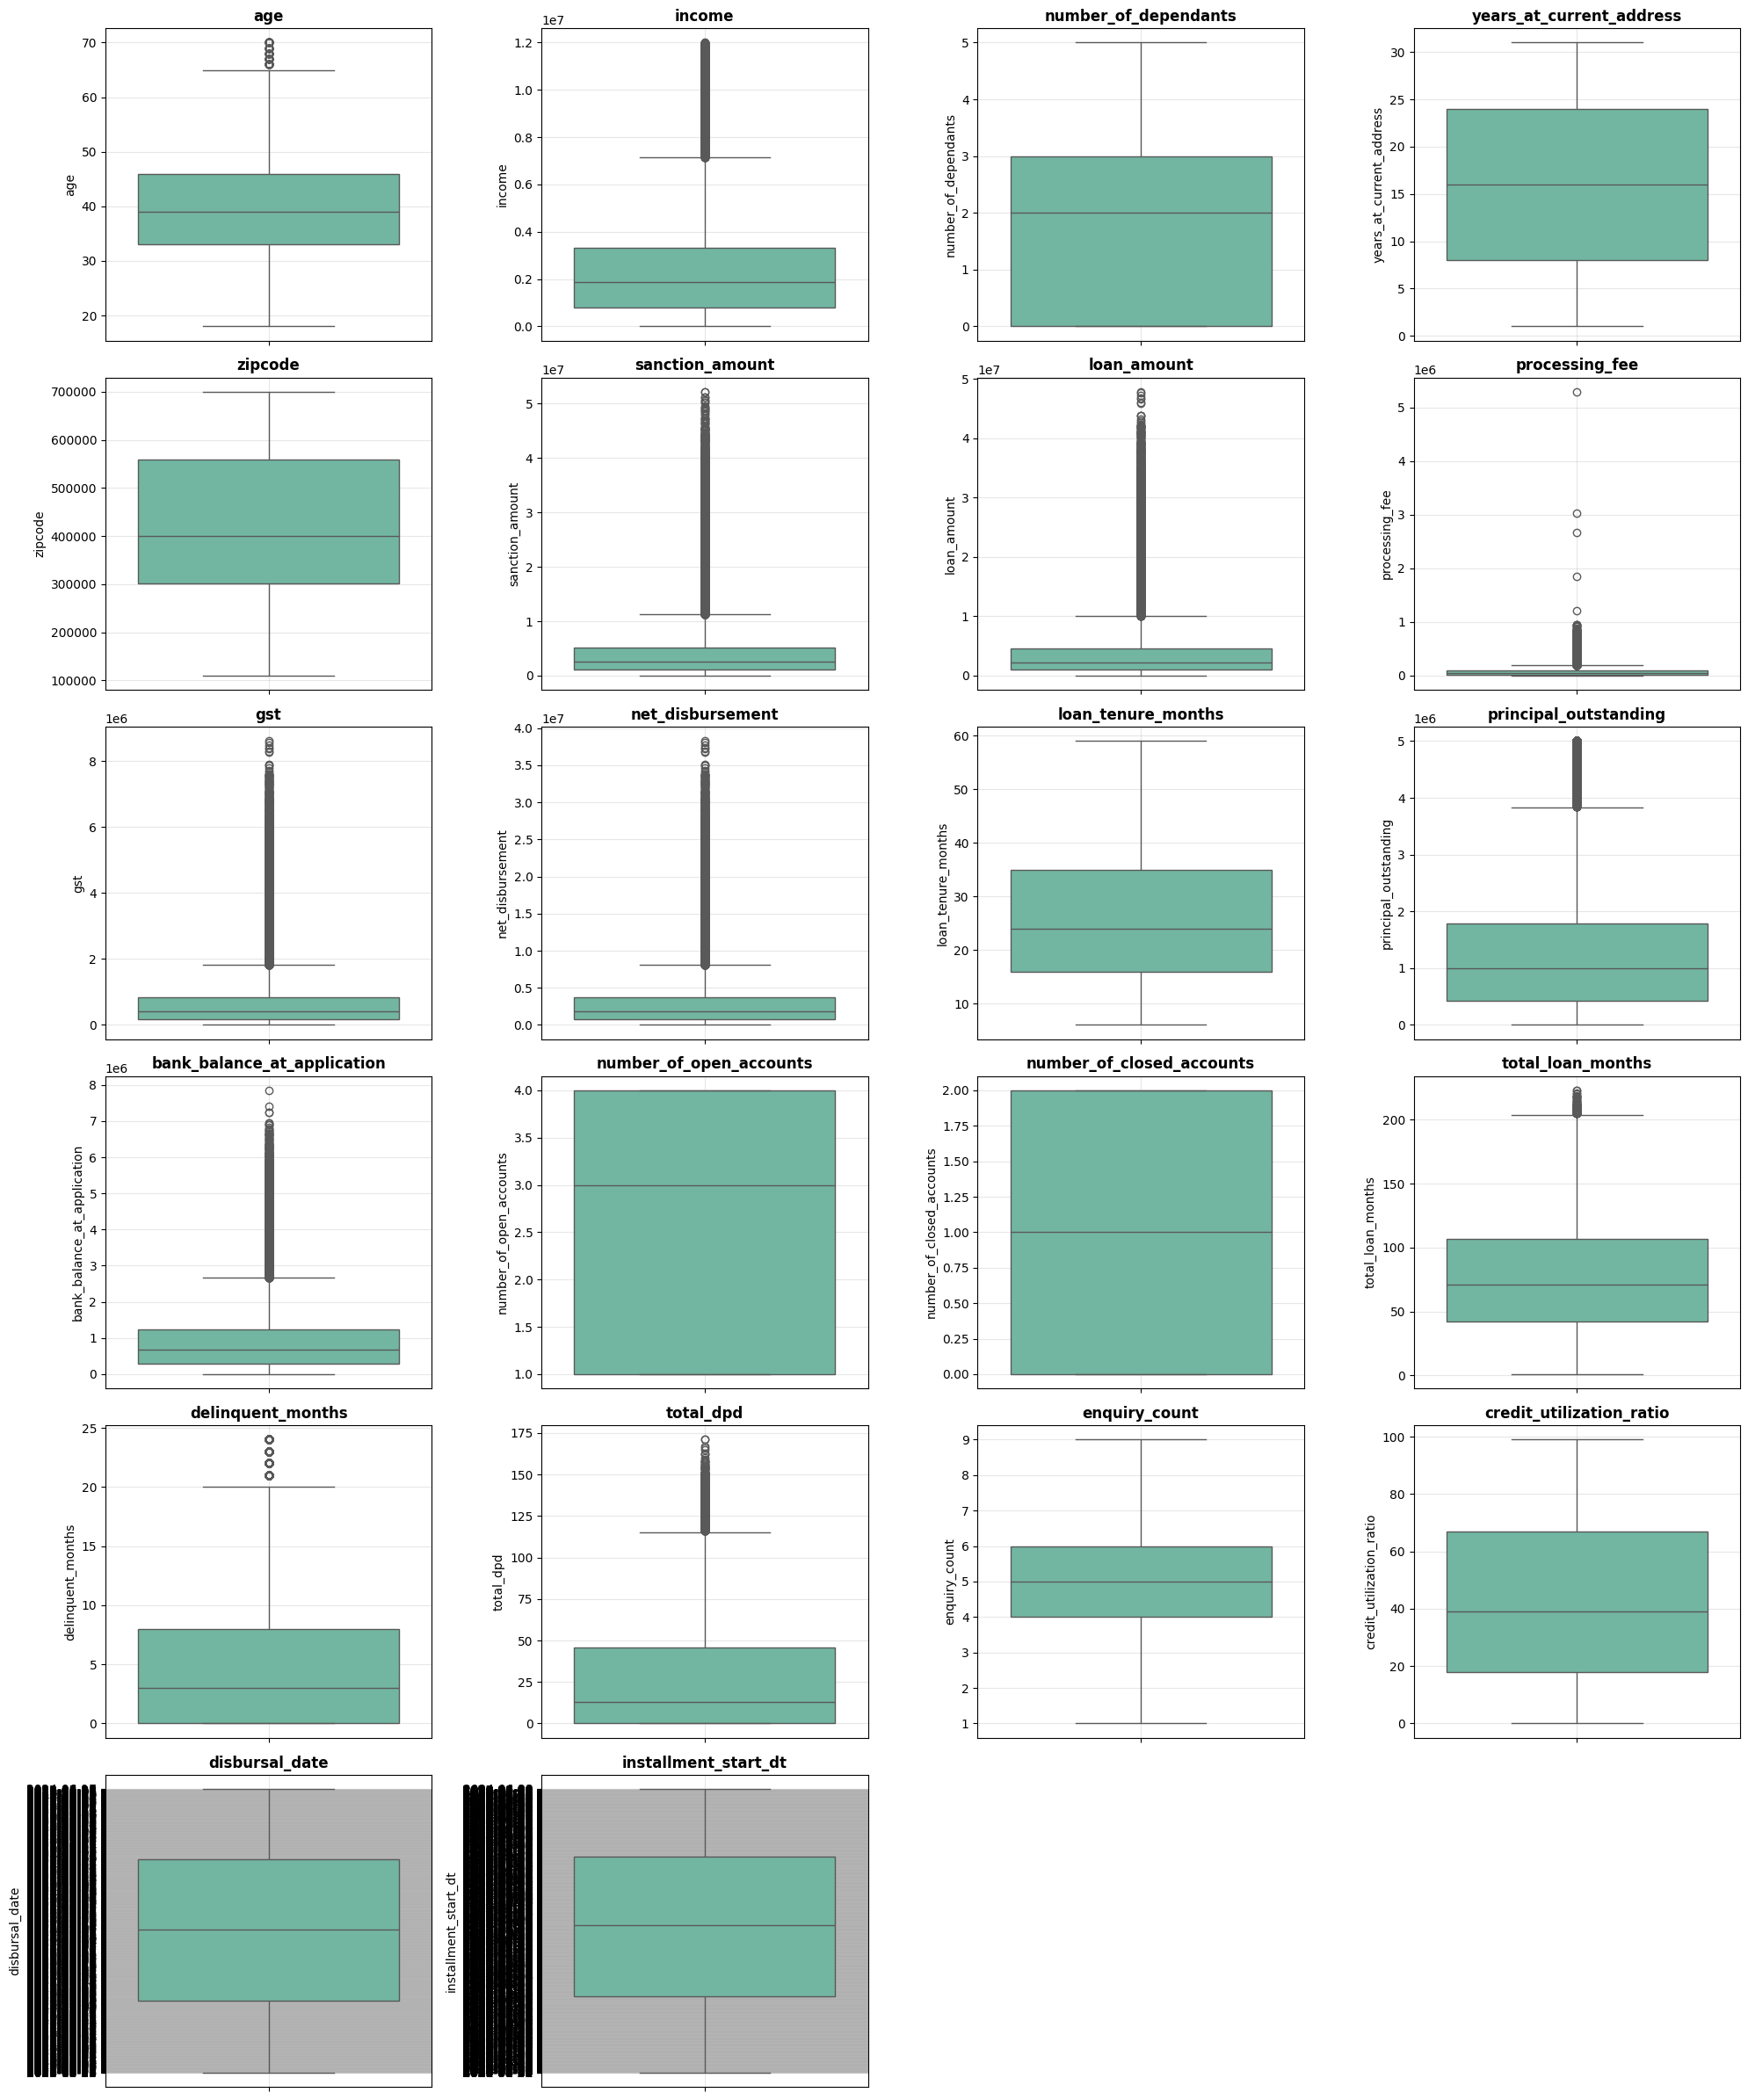

In [25]:
plot_boxplot_matrix(df_train,num_features=num_feature,n_cols=4)

In [26]:
def plot_histplot_matrix(df, num_features, n_cols=3, figsize_per_plot=(5, 4)):
    """
    Create a matrix of boxplots for numerical features
    
    Parameters:
    - df: DataFrame
    - num_features: list of numerical column names
    - n_cols: number of columns in the matrix
    - figsize_per_plot: tuple for individual plot size
    """
    n_features = len(num_features)
    n_rows = int(np.ceil(n_features / n_cols))
    
    fig, axes = plt.subplots(n_rows, n_cols, 
                            figsize=(figsize_per_plot[0] * n_cols, 
                                   figsize_per_plot[1] * n_rows))
    
    # Handle single row case
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    axes = axes.flatten()
    
    # Create boxplots
    for i, feature in enumerate(num_features):
        sns.histplot(data=df, x=feature, ax=axes[i], palette='Set2',kde=True)
        axes[i].set_title(f'{feature}', fontsize=12, fontweight='bold')
        axes[i].grid(True, alpha=0.3)
        
        # Add some statistics as text
        # q1 = df[feature].quantile(0.25)
        # q3 = df[feature].quantile(0.75)
        # median = df[feature].median()
        # axes[i].text(0.02, 0.98, f'Median: {median:.2f}\nIQR: {q3-q1:.2f}', 
        #             transform=axes[i].transAxes, verticalalignment='top',
        #             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()

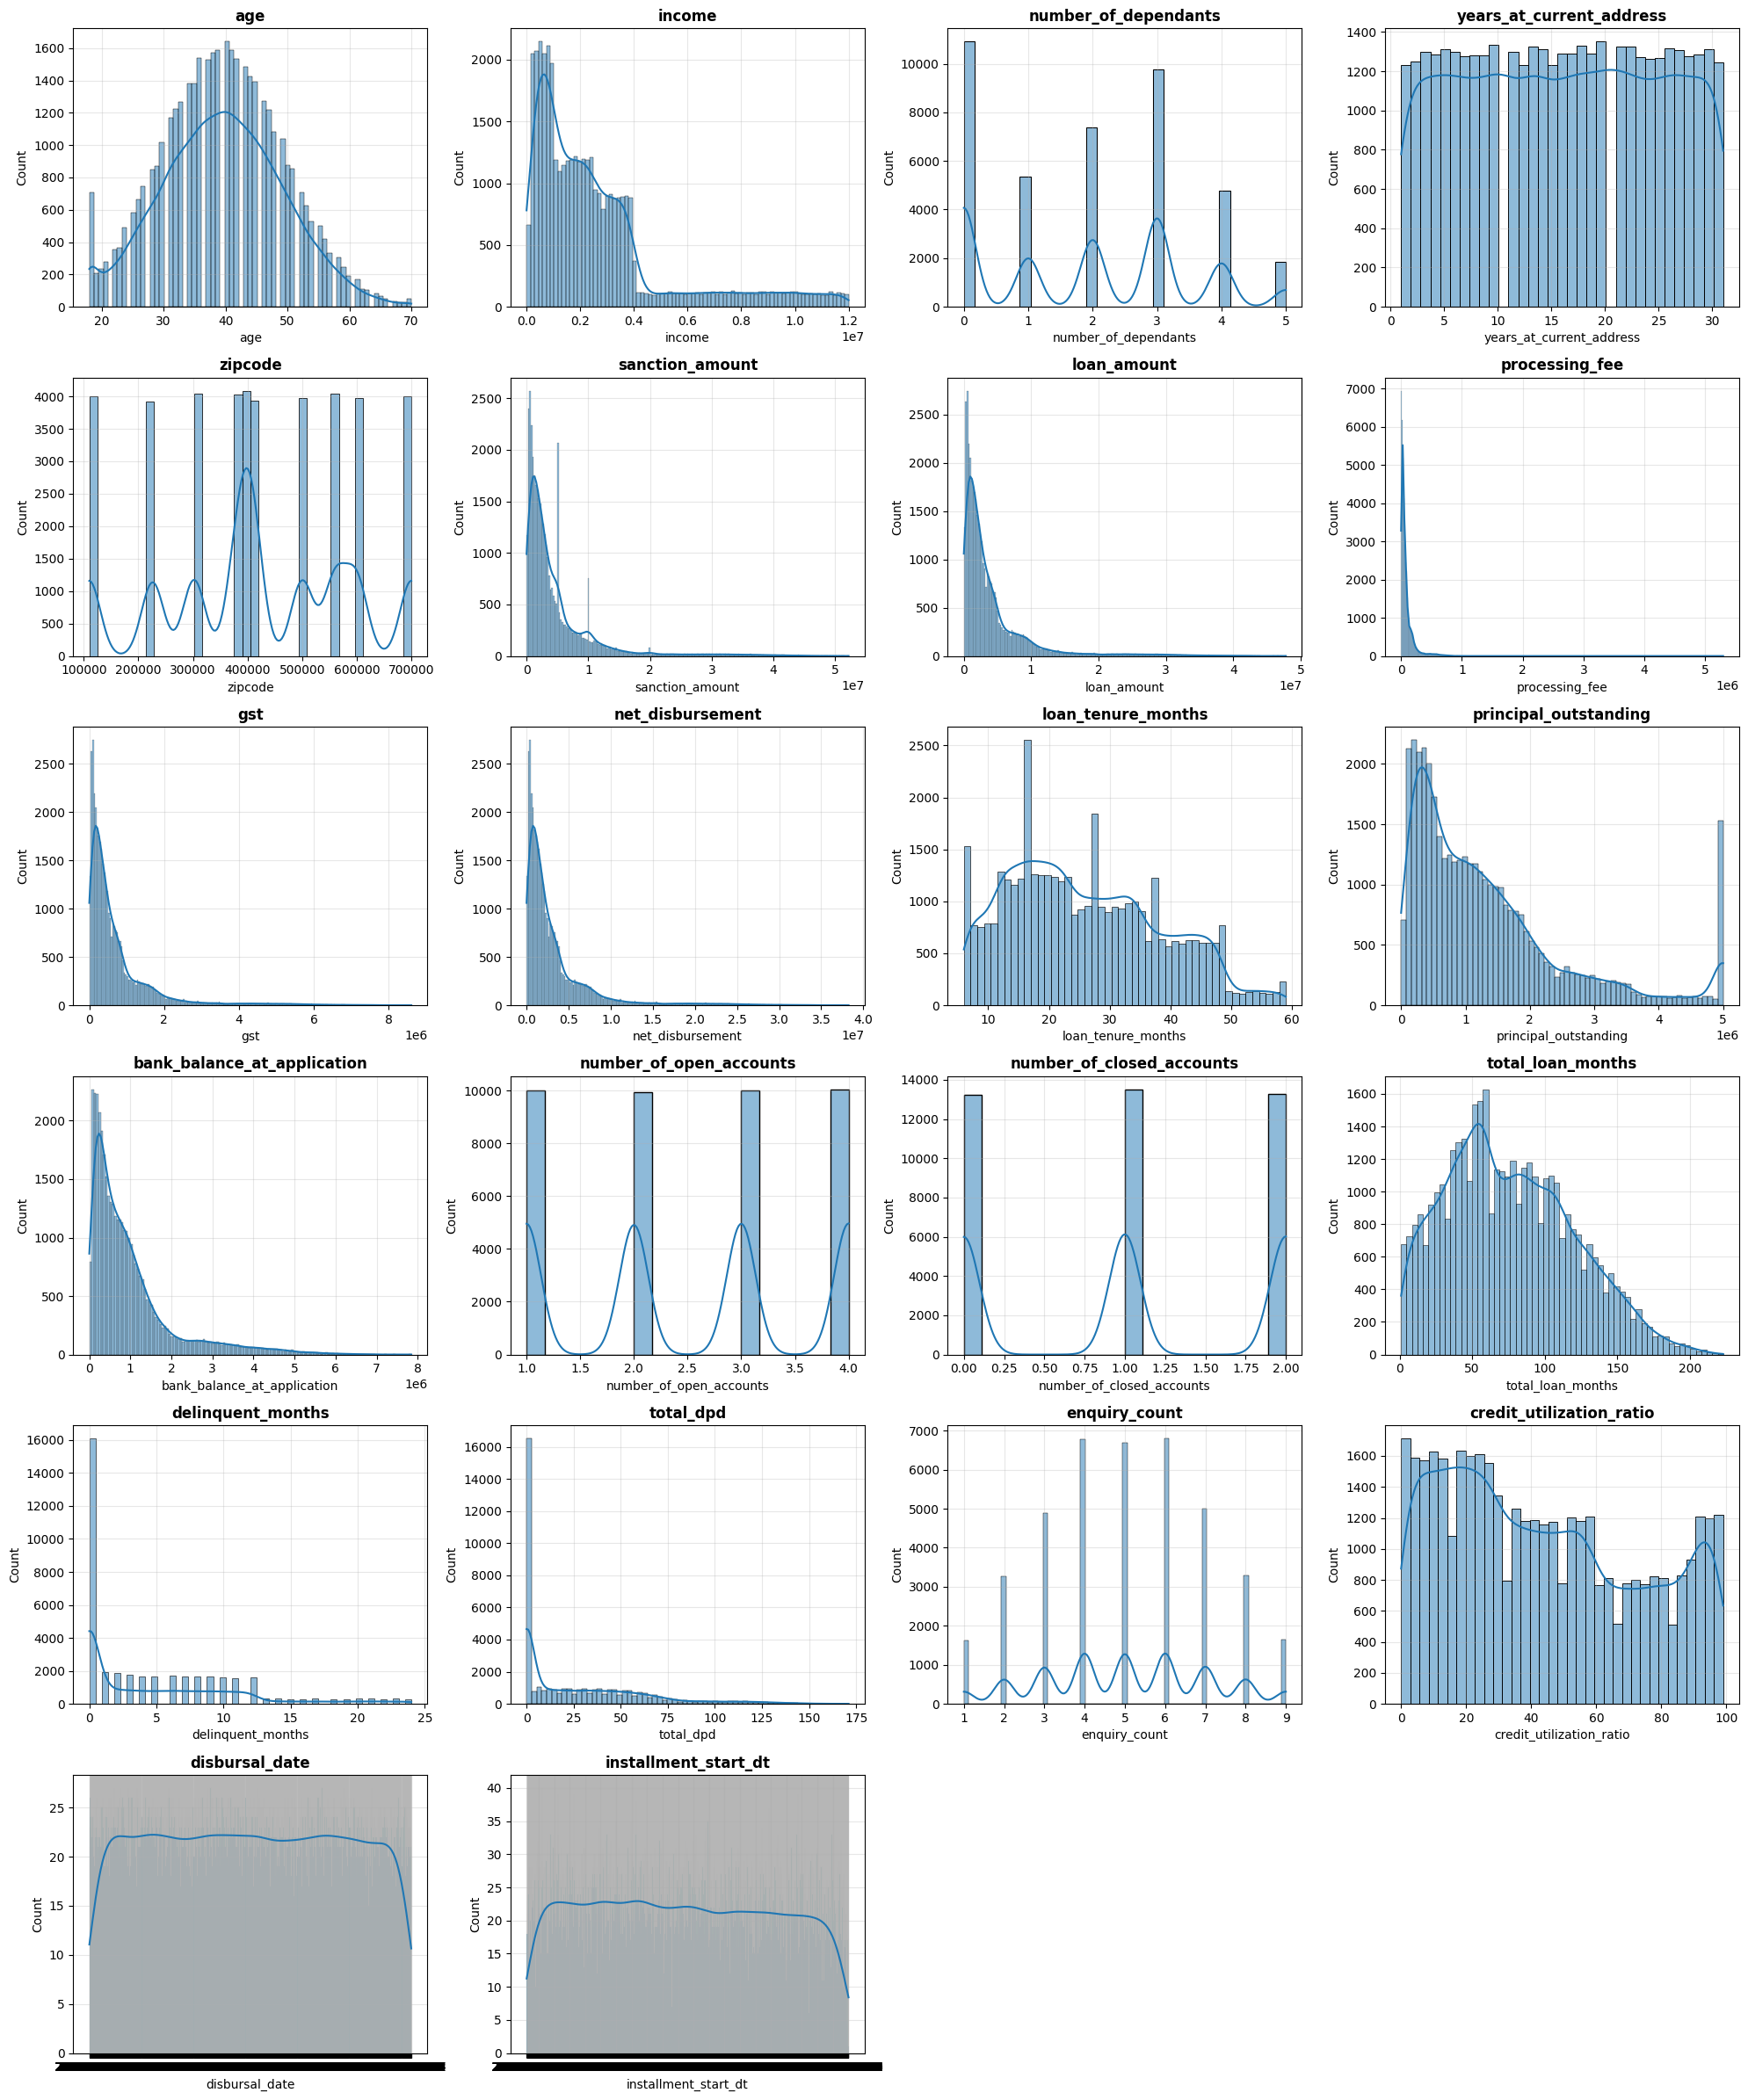

In [27]:
plot_histplot_matrix(df_train,num_feature,n_cols=4)

In [28]:
df_train['processing_fee'].describe()

count   (:.2f)
mean    (:.2f)
std     (:.2f)
min     (:.2f)
25%     (:.2f)
50%     (:.2f)
75%     (:.2f)
max     (:.2f)
Name: processing_fee, dtype: float64

In [29]:
df_train[df_train['processing_fee'] == df_train['processing_fee'].max()][['loan_amount','processing_fee']]

,loan_amount,processing_fee
9898,3626000,(:.2f)


In [30]:
df_train[(df_train['processing_fee']/df_train['loan_amount'])>0.03][['loan_amount','processing_fee']]

,loan_amount,processing_fee
23981,2234000,(:.2f)
28174,966000,(:.2f)
47089,1738000,(:.2f)
29305,2616000,(:.2f)
9898,3626000,(:.2f)


In [31]:
df_train1 = df_train[(df_train['processing_fee']/df_train['loan_amount'])<0.03].copy()
df_train1[(df_train1['processing_fee']/df_train1['loan_amount'])>0.03][['loan_amount','processing_fee']]

,loan_amount,processing_fee


In [32]:
# Apply the same for test
df_test1 = df_test[(df_test['processing_fee']/df_test['loan_amount'])<0.03].copy()
df_test1[(df_test1['processing_fee']/df_test1['loan_amount'])>0.03][['loan_amount','processing_fee']]

,loan_amount,processing_fee


In [33]:
cat_feature

Index(['cust_id', 'gender', 'marital_status', 'employment_status',
       'residence_type', 'city', 'state', 'loan_id', 'loan_purpose',
       'loan_type', 'default'],
      dtype='object')

In [34]:
for col in cat_feature:
    print(f'{col} - {df_train1[col].unique()}')

cust_id - ['C49042' 'C38678' 'C37855' ... 'C21294' 'C49229' 'C17078']
gender - ['F' 'M']
marital_status - ['Single' 'Married']
employment_status - ['Self-Employed' 'Salaried']
residence_type - ['Mortgage' 'Rented' 'Owned']
city - ['Delhi' 'Hyderabad' 'Pune' 'Lucknow' 'Ahmedabad' 'Chennai' 'Kolkata'
 'Bangalore' 'Mumbai' 'Jaipur']
state - ['Delhi' 'Telangana' 'Maharashtra' 'Uttar Pradesh' 'Gujarat' 'Tamil Nadu'
 'West Bengal' 'Karnataka' 'Rajasthan']
loan_id - ['L49042' 'L38678' 'L37855' ... 'L21294' 'L49229' 'L17078']
loan_purpose - ['Education' 'Personal' 'Home' 'Auto' 'Personaal']
loan_type - ['Secured' 'Unsecured']
default - [0 1]


In [35]:
df_train1['loan_purpose'] = df_train1['loan_purpose'].replace('Personaal','Personal')
df_test1['loan_purpose'] = df_test1['loan_purpose'].replace('Personaal','Personal')
df_train1['loan_purpose'].unique()

array(['Education', 'Personal', 'Home', 'Auto'], dtype=object)

In [36]:
df_train1[(df_train1['gst']/df_train1['loan_amount'])>0.18]

,cust_id,age,gender,marital_status,employment_status,income,number_of_dependants,residence_type,years_at_current_address,city,...,disbursal_date,installment_start_dt,number_of_open_accounts,number_of_closed_accounts,total_loan_months,delinquent_months,total_dpd,enquiry_count,credit_utilization_ratio,default


In [37]:
df_train1[df_train1['sanction_amount']<=df_train1['loan_amount']][['sanction_amount','loan_amount']]

,sanction_amount,loan_amount


## EDA

<Axes: xlabel='age', ylabel='Density'>

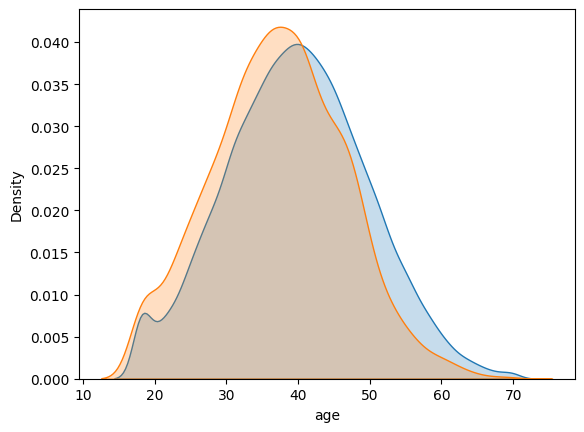

In [38]:
sns.kdeplot(df_train1[df_train1['default']==0]['age'],fill=True,label='Default=0')
sns.kdeplot(df_train1[df_train1['default']==1]['age'],fill=True,label='Default=1')

# compare shape of distributions (ignores class imbalance).

<Axes: xlabel='age', ylabel='Density'>

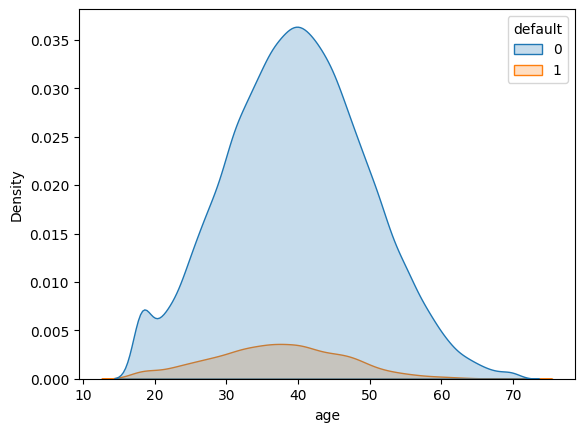

In [39]:
sns.kdeplot(df_train1,x='age',hue='default',fill=True) #compare both shape and proportion (class imbalance reflected).

<Axes: xlabel='age', ylabel='Density'>

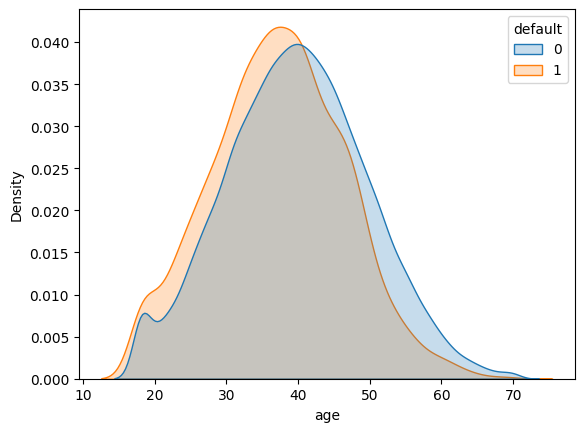

In [40]:
sns.kdeplot(df_train1,x='age',hue='default',fill=True,common_norm=False) # compare shape of distributions (ignores class imbalance).

insights -

1. orange graph is little shifted to left of blue graph which indicate that the young age are more likely to default

In [41]:
num_feature1 = num_feature.drop(['disbursal_date','installment_start_dt'])

In [42]:
def plot_kdeplot_matrix(df, num_features, n_cols=3, figsize_per_plot=(5, 4)):
    """
    Create a matrix of boxplots for numerical features
    
    Parameters:
    - df: DataFrame
    - num_features: list of numerical column names
    - n_cols: number of columns in the matrix
    - figsize_per_plot: tuple for individual plot size
    """
    n_features = len(num_features)
    n_rows = int(np.ceil(n_features / n_cols))
    
    fig, axes = plt.subplots(n_rows, n_cols, 
                            figsize=(figsize_per_plot[0] * n_cols, 
                                   figsize_per_plot[1] * n_rows))
    
    # Handle single row case
    if n_rows == 1:
        axes = axes.reshape(1, -1)
    axes = axes.flatten()
    
    # Create boxplots
    for i, feature in enumerate(num_features):
        sns.kdeplot(data=df, x=feature, hue='default',fill=True,common_norm=False,ax=axes[i], palette='Set2')
        axes[i].set_title(f'{feature}', fontsize=12, fontweight='bold')
        axes[i].grid(True, alpha=0.3)
    
    # Hide unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()

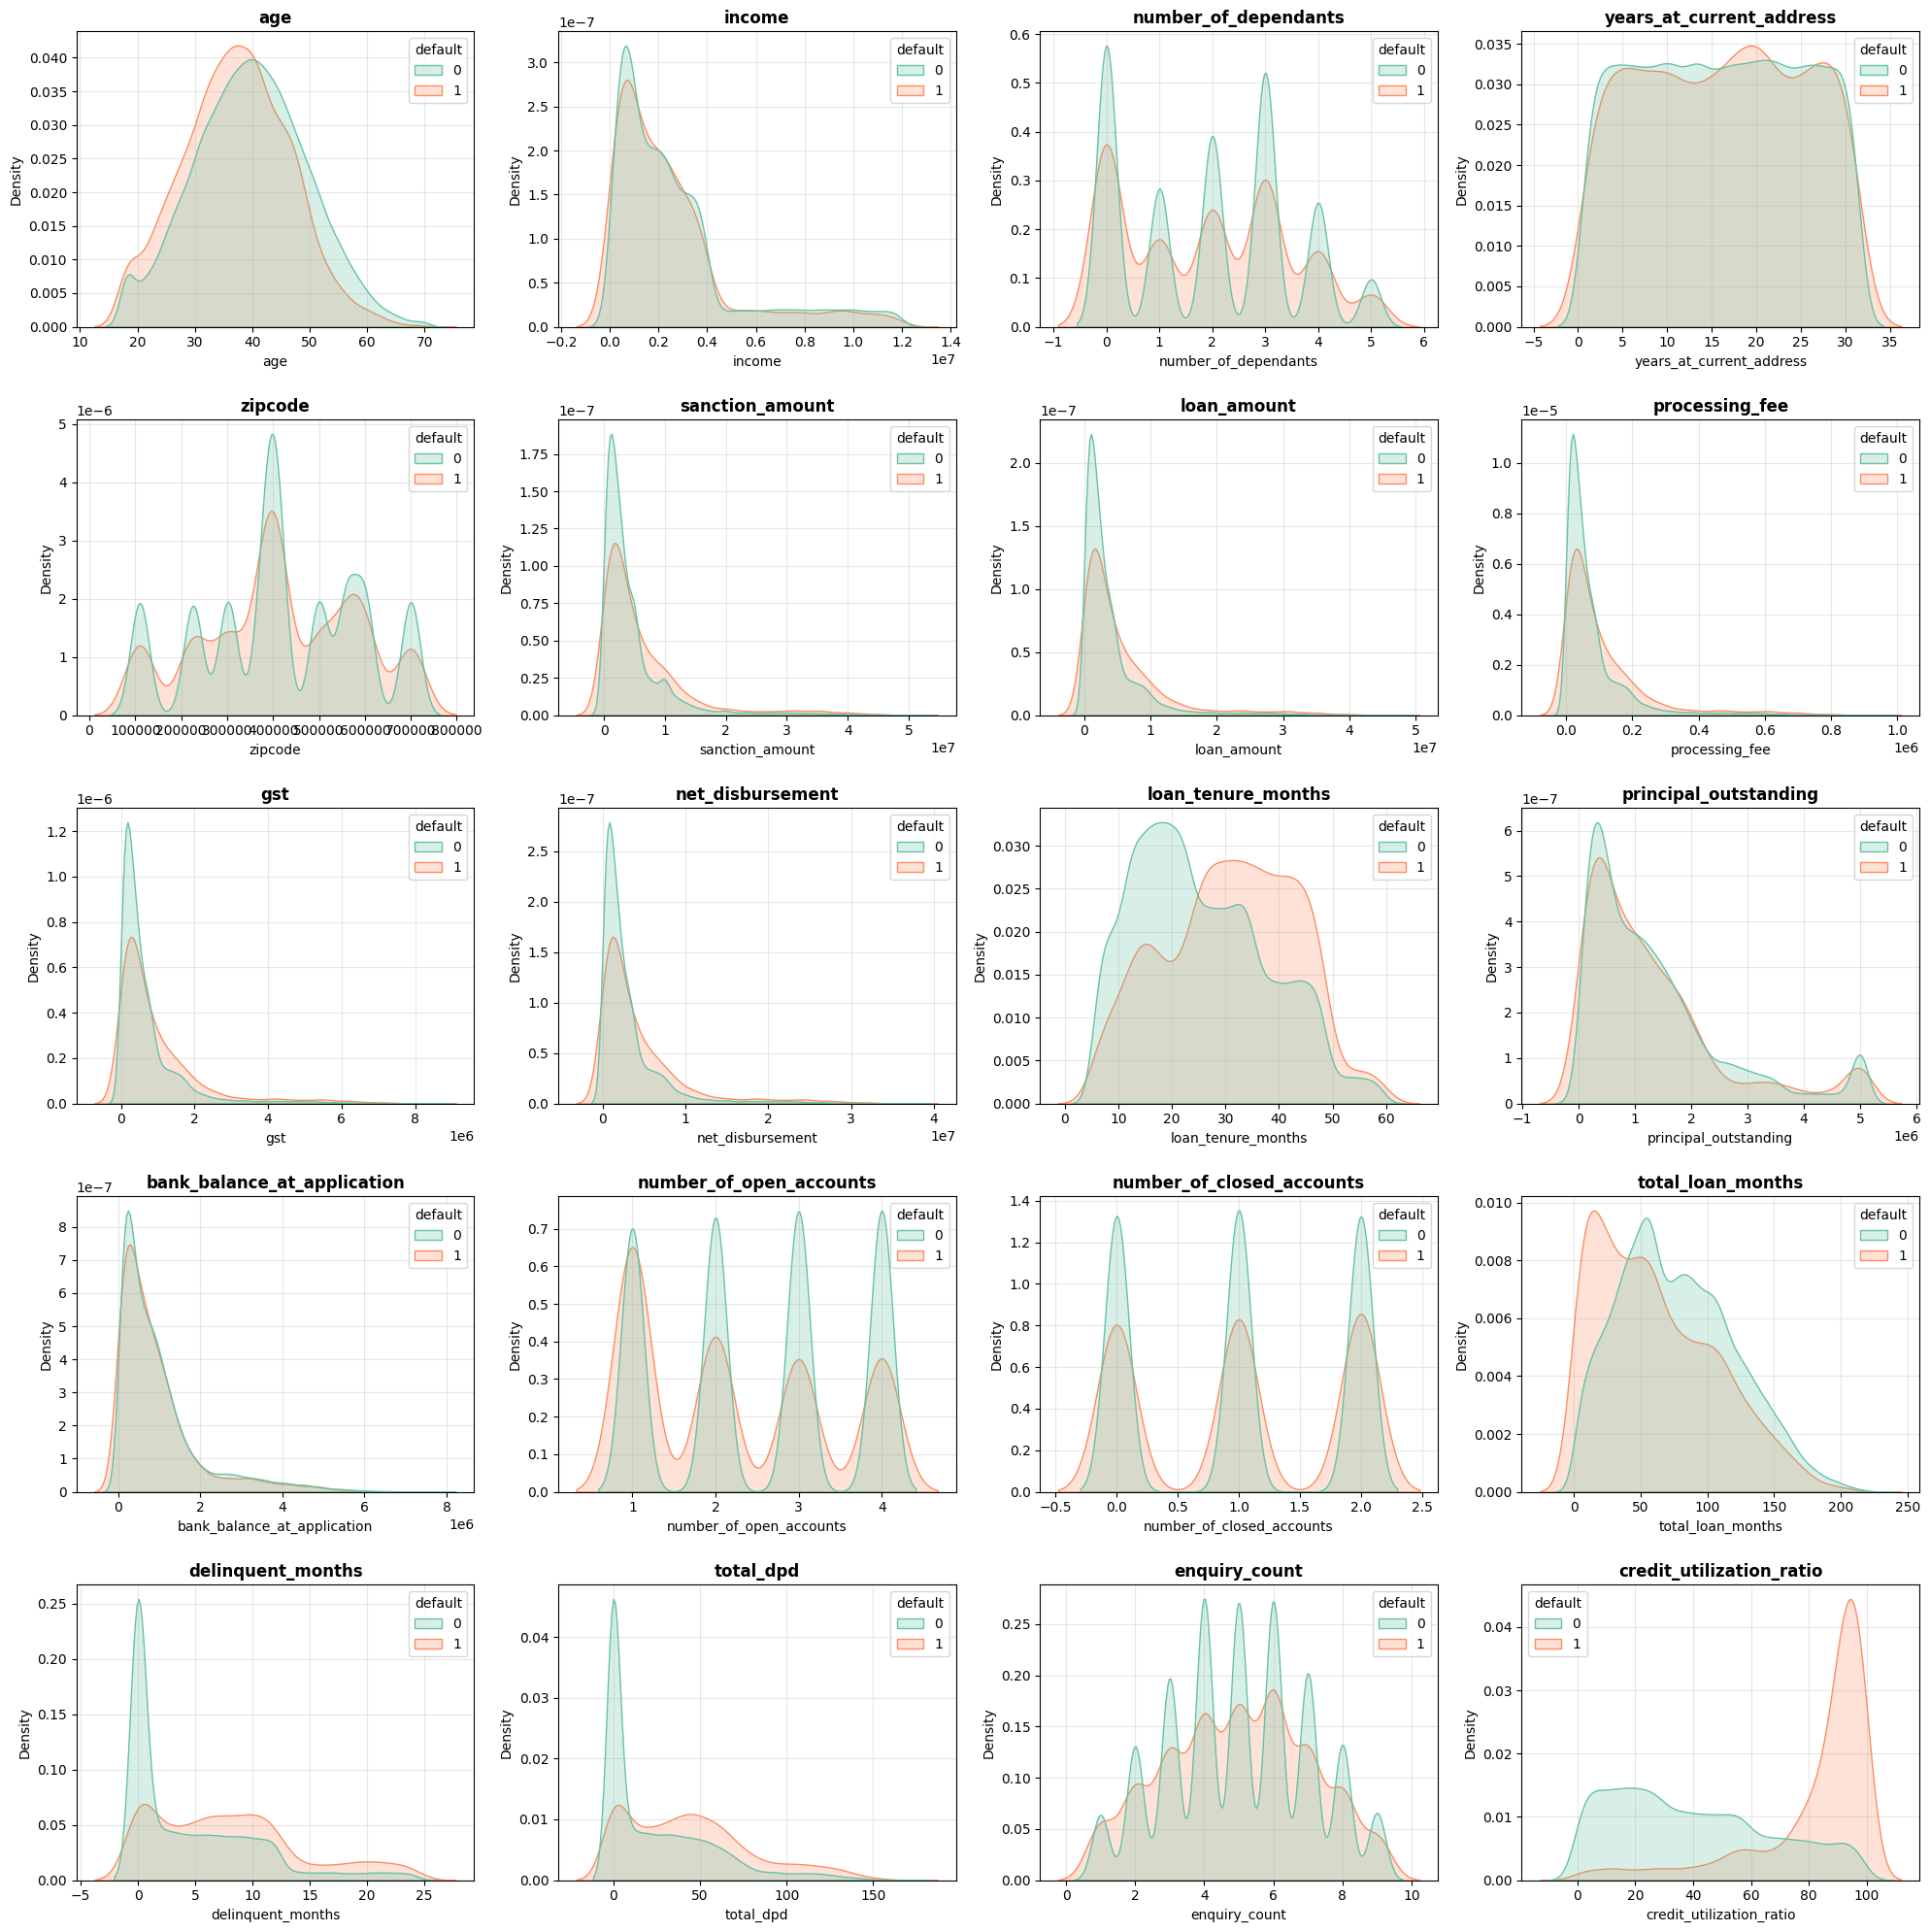

In [43]:
plot_kdeplot_matrix(df_train1,num_feature1,n_cols=4)

In [44]:
# sns.pairplot(df_test1,hue='default')

## Feature engg

In [45]:
df_train1['loan_to_income'] = round(df_train1['loan_amount']/df_train1['income'],2)
df_test1['loan_to_income'] = round(df_test1['loan_amount']/df_test1['income'],2)
df_train1['loan_to_income'].describe()

count   (:.2f)
mean    (:.2f)
std     (:.2f)
min     (:.2f)
25%     (:.2f)
50%     (:.2f)
75%     (:.2f)
max     (:.2f)
Name: loan_to_income, dtype: float64

<Axes: xlabel='loan_to_income', ylabel='Density'>

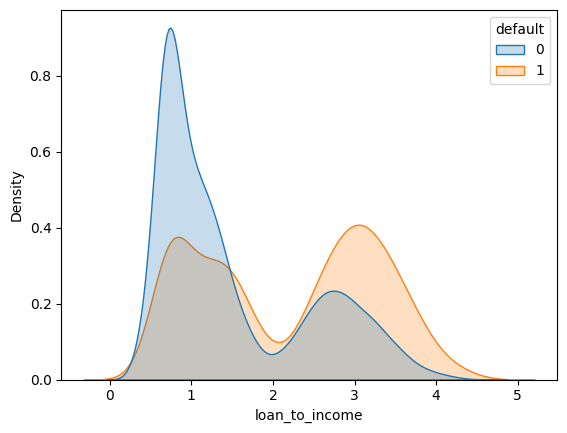

In [46]:
sns.kdeplot(df_train1,x='loan_to_income',hue='default',fill=True,common_norm=False)

In [47]:
df_train1['delinquent_ratio'] = round((df_train1['delinquent_months']/df_train1['total_loan_months'])*100,2)
df_train1[['delinquent_months','total_loan_months','delinquent_ratio']]

,delinquent_months,total_loan_months,delinquent_ratio
49041,10,83,(:.2f)
38677,0,119,(:.2f)
37854,0,115,(:.2f)
35064,0,42,(:.2f)
20064,13,65,(:.2f)
...,...,...,...
1607,12,25,(:.2f)
5558,14,52,(:.2f)
21293,3,74,(:.2f)
49228,0,88,(:.2f)


In [48]:
df_test1['loan_to_income'] = round(df_test1['loan_amount']/df_test1['income'],2)
df_test1['delinquent_ratio'] = round((df_test1['delinquent_months']/df_test1['total_loan_months'])*100,2)

<Axes: xlabel='delinquent_ratio', ylabel='Density'>

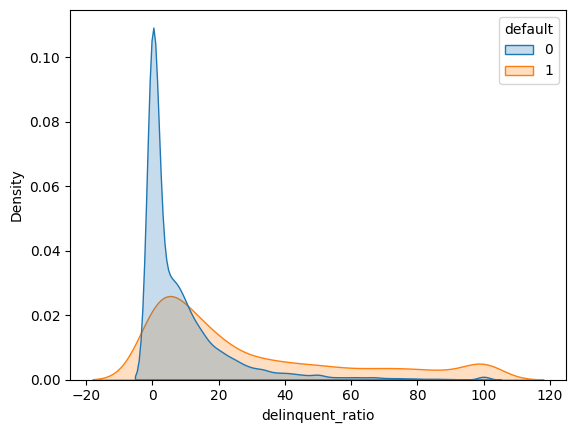

In [49]:
sns.kdeplot(df_train1,x='delinquent_ratio',hue='default',fill=True,common_norm=False)

In [50]:
df_train1['avg_dpd_per_delinquency'] = np.where(
    df_train1['delinquent_months'] != 0,
    round(df_train1['total_dpd']/df_train1['delinquent_months'],1),
    0
    )
df_train1['avg_dpd_per_delinquency'].describe()

count   (:.2f)
mean    (:.2f)
std     (:.2f)
min     (:.2f)
25%     (:.2f)
50%     (:.2f)
75%     (:.2f)
max     (:.2f)
Name: avg_dpd_per_delinquency, dtype: float64

In [51]:
df_test1['avg_dpd_per_delinquency'] = np.where(
    df_test1['delinquent_months'] != 0,
    round(df_test1['total_dpd']/df_test1['delinquent_months'],1),
    0
    )

<Axes: xlabel='avg_dpd_per_delinquency', ylabel='Density'>

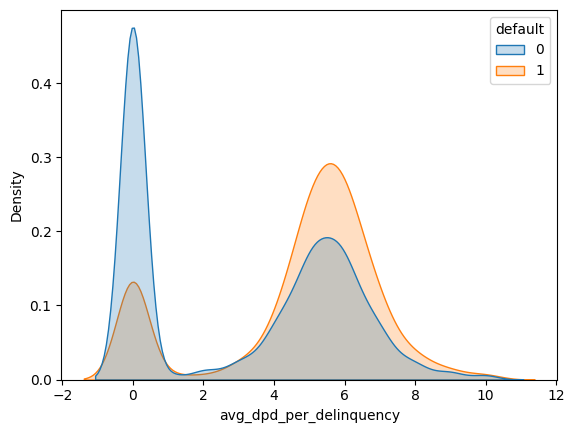

In [52]:
sns.kdeplot(df_train1,x='avg_dpd_per_delinquency',hue='default',fill=True,common_norm=False)

In [53]:
df_train1.columns

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status',
       'income', 'number_of_dependants', 'residence_type',
       'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id',
       'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount',
       'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months',
       'principal_outstanding', 'bank_balance_at_application',
       'disbursal_date', 'installment_start_dt', 'number_of_open_accounts',
       'number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
       'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default',
       'loan_to_income', 'delinquent_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [54]:
df_train2 = df_train1.drop(columns=['cust_id','loan_id','disbursal_date', 'installment_start_dt','loan_amount','income','total_loan_months', 'delinquent_months','total_dpd'],axis=1)
df_test2 = df_test1.drop(columns=['cust_id','loan_id','disbursal_date', 'installment_start_dt','loan_amount','income','total_loan_months', 'delinquent_months','total_dpd'],axis=1)

In [55]:
df_train2.columns

Index(['age', 'gender', 'marital_status', 'employment_status',
       'number_of_dependants', 'residence_type', 'years_at_current_address',
       'city', 'state', 'zipcode', 'loan_purpose', 'loan_type',
       'sanction_amount', 'processing_fee', 'gst', 'net_disbursement',
       'loan_tenure_months', 'principal_outstanding',
       'bank_balance_at_application', 'number_of_open_accounts',
       'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'default', 'loan_to_income',
       'delinquent_ratio', 'avg_dpd_per_delinquency'],
      dtype='object')

In [56]:
num_col = df_train2.select_dtypes(exclude='object').columns.drop('default')

In [57]:
x_train = df_train2.drop('default',axis=1)
y_train = df_train2['default']

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train[num_col] = scaler.fit_transform(x_train[num_col])

x_train.describe()


,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquent_ratio,avg_dpd_per_delinquency
count,(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f)
mean,(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f)
std,(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f)
min,(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f)
25%,(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f)
50%,(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f)
75%,(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f)
max,(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f)


In [58]:
x_test = df_test2.drop('default',axis=1)
y_test = df_test2['default']

x_test[num_col] = scaler.transform(x_test[num_col])
x_test.describe()

,age,number_of_dependants,years_at_current_address,zipcode,sanction_amount,processing_fee,gst,net_disbursement,loan_tenure_months,principal_outstanding,bank_balance_at_application,number_of_open_accounts,number_of_closed_accounts,enquiry_count,credit_utilization_ratio,loan_to_income,delinquent_ratio,avg_dpd_per_delinquency
count,(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f)
mean,(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f)
std,(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f)
min,(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f)
25%,(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f)
50%,(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f)
75%,(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f)
max,(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f)


In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def cal_vif(data):
    vif_df = pd.DataFrame()
    vif_df['cols'] = data.columns
    vif_df['vif'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df

In [60]:
cal_vif(x_train[num_col])

,cols,vif
0,age,(:.2f)
1,number_of_dependants,(:.2f)
2,years_at_current_address,(:.2f)
3,zipcode,(:.2f)
4,sanction_amount,(:.2f)
5,processing_fee,(:.2f)
6,gst,(:.2f)
7,net_disbursement,(:.2f)
8,loan_tenure_months,(:.2f)
9,principal_outstanding,(:.2f)


In [61]:
feature_to_drop_vif = ['sanction_amount','processing_fee','gst','net_disbursement','principal_outstanding']

x_train1 = x_train.drop(feature_to_drop_vif,axis=1)
num_col1 = x_train1.select_dtypes(exclude='object').columns
num_col1

Index(['age', 'number_of_dependants', 'years_at_current_address', 'zipcode',
       'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count',
       'credit_utilization_ratio', 'loan_to_income', 'delinquent_ratio',
       'avg_dpd_per_delinquency'],
      dtype='object')

In [62]:
vif_df = cal_vif(x_train1[num_col1])
vif_df

,cols,vif
0,age,(:.2f)
1,number_of_dependants,(:.2f)
2,years_at_current_address,(:.2f)
3,zipcode,(:.2f)
4,loan_tenure_months,(:.2f)
5,bank_balance_at_application,(:.2f)
6,number_of_open_accounts,(:.2f)
7,number_of_closed_accounts,(:.2f)
8,enquiry_count,(:.2f)
9,credit_utilization_ratio,(:.2f)


In [63]:
selected_num_col_vif = vif_df.cols.values
selected_num_col_vif

array(['age', 'number_of_dependants', 'years_at_current_address',
       'zipcode', 'loan_tenure_months', 'bank_balance_at_application',
       'number_of_open_accounts', 'number_of_closed_accounts',
       'enquiry_count', 'credit_utilization_ratio', 'loan_to_income',
       'delinquent_ratio', 'avg_dpd_per_delinquency'], dtype=object)

<Axes: >

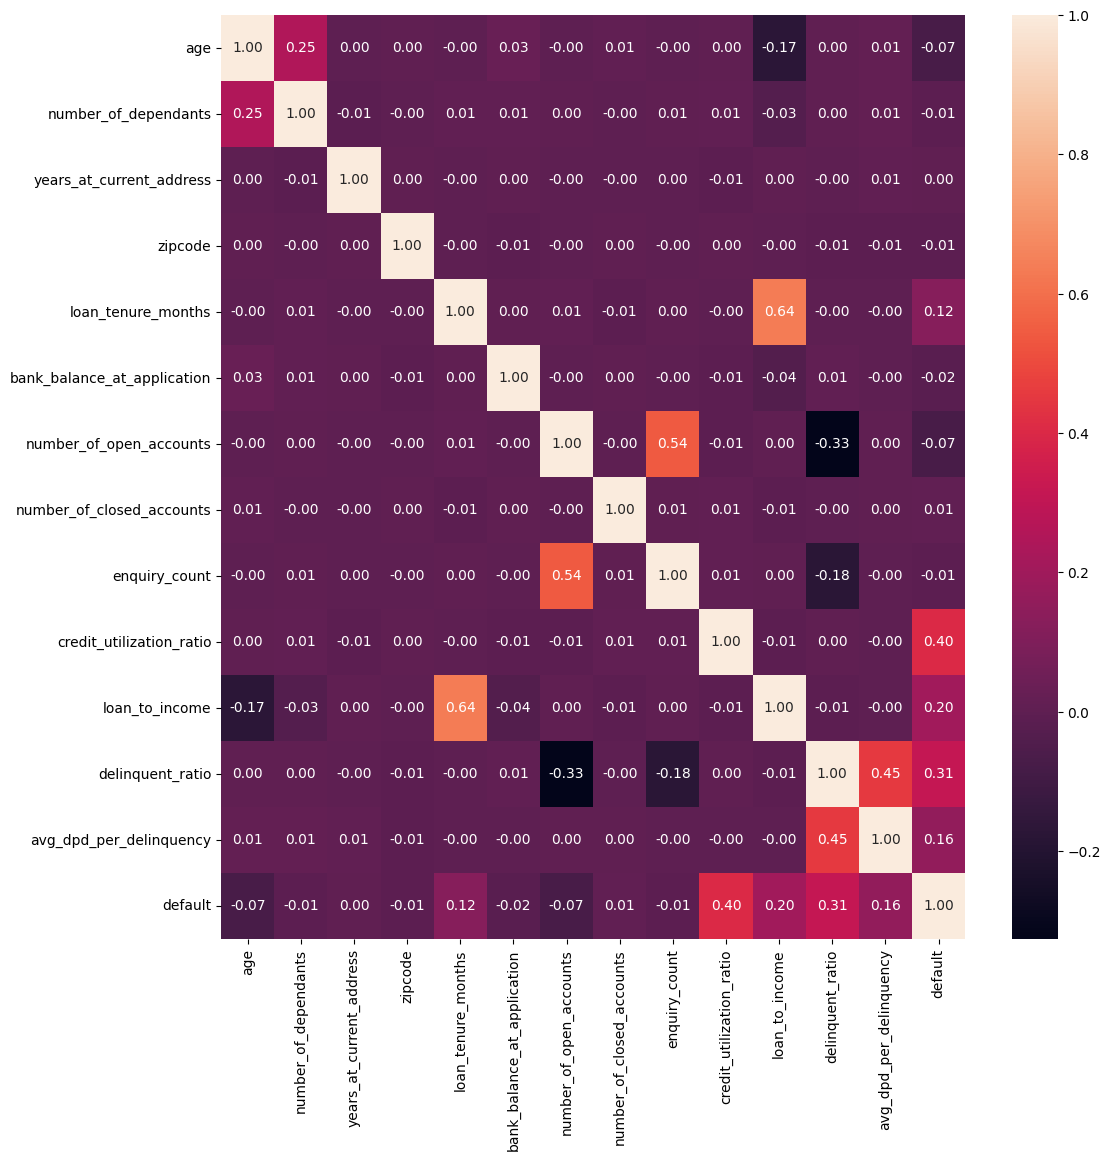

In [64]:
cm = df_train2[num_col1.append(pd.Index(['default']))].corr()
plt.figure(figsize=(12,12))
sns.heatmap(cm,annot=True,fmt='0.2f')

In [65]:
cat_feature = df_train2.select_dtypes(include='object').columns
cat_feature = cat_feature.append(pd.Index(['default']))
cat_feature

Index(['gender', 'marital_status', 'employment_status', 'residence_type',
       'city', 'state', 'loan_purpose', 'loan_type', 'default'],
      dtype='object')

Woe and Iv used in credite risk 

In [66]:
temp = pd.concat([x_train1,y_train],axis=1)
temp.groupby('loan_purpose')['default'].agg(['count','sum'])

,count,sum
loan_purpose,,
Auto,7964,343
Education,5982,592
Home,12046,1864
Personal,13995,639


In [67]:
## Create a fun to calculate Woe and IV

def cal_woe_iv(df,feature,target):
    
    grouped = df.groupby(feature)[target].agg(['count','sum'])
    grouped = grouped.rename(columns={'count':'total','sum':'Default_bad'})
    grouped['Not_Default_good'] = grouped['total'] - grouped['Default_bad']
    
    total_bad = grouped['Default_bad'].sum()
    total_good = grouped['Not_Default_good'].sum()
    
    grouped['Default_bad_pct'] = round(grouped['Default_bad']/total_bad,2)
    grouped['Not_Default_good_pct'] = round(grouped['Not_Default_good']/total_good,2)
    
    grouped['woe'] = round(np.log(grouped['Default_bad_pct']/grouped['Not_Default_good_pct']),2)
    grouped['iv'] = round((grouped['Default_bad_pct'] - grouped['Not_Default_good_pct'])*grouped['woe'],2)
    
    grouped['woe'] = grouped['woe'].replace([np.inf,-np.inf],0)
    grouped['iv'] = grouped['iv'].replace([np.inf,-np.inf],0)
    
    total_iv =  grouped['iv'].sum()
    
    return grouped,total_iv

grouped,total_iv = cal_woe_iv((pd.concat([x_train1,y_train],axis=1)),'loan_purpose','default')

In [68]:
grouped

,total,Default_bad,Not_Default_good,Default_bad_pct,Not_Default_good_pct,woe,iv
loan_purpose,,,,,,,
Auto,7964,343,7621,(:.2f),(:.2f),(:.2f),(:.2f)
Education,5982,592,5390,(:.2f),(:.2f),(:.2f),(:.2f)
Home,12046,1864,10182,(:.2f),(:.2f),(:.2f),(:.2f)
Personal,13995,639,13356,(:.2f),(:.2f),(:.2f),(:.2f)


In [69]:
total_iv

np.float64(0.37)

In [70]:
pd.cut(x_train1['loan_to_income'],bins=10)

49041       (0.2, 0.3]
38677       (0.3, 0.4]
37854    (-0.001, 0.1]
35064    (-0.001, 0.1]
20064       (0.7, 0.8]
             ...      
1607        (0.4, 0.5]
5558        (0.1, 0.2]
21293       (0.1, 0.2]
49228       (0.2, 0.3]
17077       (0.4, 0.5]
Name: loan_to_income, Length: 39987, dtype: category
Categories (10, interval[float64, right]): [(-0.001, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] ... (0.6, 0.7] < (0.7, 0.8] < (0.8, 0.9] < (0.9, 1.0]]

In [71]:
iv_values = {}
for i in x_train1.columns:
    if x_train1[i].dtype == 'object':
        _,total_iv = cal_woe_iv((pd.concat([x_train1,y_train],axis=1)),i,'default')
    else:
        x_binned = pd.cut(x_train1[i],bins=10,labels=False)
        _,total_iv = cal_woe_iv((pd.concat([x_binned,y_train],axis=1)),i,'default')
    iv_values[i] = total_iv
iv_values

{'age': np.float64(0.08),
 'gender': np.float64(0.0),
 'marital_status': np.float64(0.0),
 'employment_status': np.float64(0.0),
 'number_of_dependants': np.float64(0.0),
 'residence_type': np.float64(0.26),
 'years_at_current_address': np.float64(0.0),
 'city': np.float64(0.0),
 'state': np.float64(0.0),
 'zipcode': np.float64(0.0),
 'loan_purpose': np.float64(0.37),
 'loan_type': np.float64(0.16999999999999998),
 'loan_tenure_months': np.float64(0.24),
 'bank_balance_at_application': np.float64(0.0),
 'number_of_open_accounts': np.float64(0.1),
 'number_of_closed_accounts': np.float64(0.0),
 'enquiry_count': np.float64(0.0),
 'credit_utilization_ratio': np.float64(2.3),
 'loan_to_income': np.float64(0.47000000000000003),
 'delinquent_ratio': np.float64(0.32),
 'avg_dpd_per_delinquency': np.float64(0.4)}

In [72]:
iv_df = pd.DataFrame(list(iv_values.items()),columns=['Feature','IV'])
iv_df = iv_df.sort_values(by='IV',ascending=False)
iv_df

,Feature,IV
17,credit_utilization_ratio,(:.2f)
18,loan_to_income,(:.2f)
20,avg_dpd_per_delinquency,(:.2f)
10,loan_purpose,(:.2f)
19,delinquent_ratio,(:.2f)
5,residence_type,(:.2f)
12,loan_tenure_months,(:.2f)
11,loan_type,(:.2f)
14,number_of_open_accounts,(:.2f)
0,age,(:.2f)


In [73]:
selected_feature_iv = [i for i, iv in iv_values.items() if iv > 0.02]
selected_feature_iv


['age',
 'residence_type',
 'loan_purpose',
 'loan_type',
 'loan_tenure_months',
 'number_of_open_accounts',
 'credit_utilization_ratio',
 'loan_to_income',
 'delinquent_ratio',
 'avg_dpd_per_delinquency']

In [74]:
## Feature Encoding

x_train_redued = x_train1[selected_feature_iv]
x_test_redued = x_test[selected_feature_iv]

In [75]:
x_train_redued.head()

,age,residence_type,loan_purpose,loan_type,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquent_ratio,avg_dpd_per_delinquency
49041,(:.2f),Mortgage,Education,Secured,(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f)
38677,(:.2f),Rented,Education,Secured,(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f)
37854,(:.2f),Owned,Personal,Unsecured,(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f)
35064,(:.2f),Owned,Personal,Unsecured,(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f)
20064,(:.2f),Owned,Home,Secured,(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f)


In [76]:
x_train_encoded = pd.get_dummies(x_train_redued,drop_first=True,dtype=int)
x_test_encoded = pd.get_dummies(x_test_redued,drop_first=True,dtype=int)

x_train_encoded.head()

,age,loan_tenure_months,number_of_open_accounts,credit_utilization_ratio,loan_to_income,delinquent_ratio,avg_dpd_per_delinquency,residence_type_Owned,residence_type_Rented,loan_purpose_Education,loan_purpose_Home,loan_purpose_Personal,loan_type_Unsecured
49041,(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),0,0,1,0,0,0
38677,(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),0,1,1,0,0,0
37854,(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),1,0,0,0,1,1
35064,(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),1,0,0,0,1,1
20064,(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),1,0,0,1,0,0


## Model Training
    # With out handaling class imbalance

In [77]:
y_train.value_counts()

default
0    36549
1     3438
Name: count, dtype: int64

In [78]:
# With out handaling class imbalance

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

model = LogisticRegression()
model.fit(x_train_encoded,y_train)

y_pred = model.predict(x_test_encoded)

cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      9139
           1       0.85      0.71      0.77       859

    accuracy                           0.96      9998
   macro avg       0.91      0.85      0.88      9998
weighted avg       0.96      0.96      0.96      9998



In [79]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train_encoded,y_train)

y_pred = model.predict(x_test_encoded)

cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      9139
           1       0.86      0.69      0.77       859

    accuracy                           0.96      9998
   macro avg       0.91      0.84      0.87      9998
weighted avg       0.96      0.96      0.96      9998



In [80]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(x_train_encoded,y_train)

y_pred = model.predict(x_test_encoded)

cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      9139
           1       0.81      0.76      0.78       859

    accuracy                           0.96      9998
   macro avg       0.90      0.87      0.88      9998
weighted avg       0.96      0.96      0.96      9998



In [81]:
from sklearn.model_selection import RandomizedSearchCV

params_dict = {
    'C':np.logspace(-4,4,20),
    'solver':['lbfgs','saga','liblinear','newton-cg']
}

log_reg = LogisticRegression(max_iter=10000)

randomCv = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=params_dict,
    n_iter=50,
    scoring='f1',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
) 

randomCv.fit(x_train_encoded,y_train)

print(f'Best Params {randomCv.best_params_}')
print(f'Best Score {randomCv.best_score_}')

best_model = randomCv.best_estimator_
y_pred = best_model.predict(x_test_encoded)

print('classification_report')
print(classification_report(y_test,y_pred))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END .............................C=0.0001, solver=lbfgs; total time=   0.0s
[CV] END .............................C=0.0001, solver=lbfgs; total time=   0.0s
[CV] END ...........C=0.012742749857031334, solver=liblinear; total time=   0.0s
[CV] END ...........C=0.012742749857031334, solver=liblinear; total time=   0.0s
[CV] END ............C=0.08858667904100823, solver=liblinear; total time=   0.0s
[CV] END .............................C=0.0001, solver=lbfgs; total time=   0.0s
[CV] END ............C=0.08858667904100823, solver=newton-cg; total time=   0.0s
[CV] END ...........C=0.012742749857031334, solver=liblinear; total time=   0.0s
[CV] END ............C=0.08858667904100823, solver=newton-cg; total time=   0.0s
[CV] END ............C=0.08858667904100823, solver=liblinear; total time=   0.0s
[CV] END ............C=0.08858667904100823, solver=liblinear; total time=   0.1s
[CV] END ...........C=0.004832930238571752, sol

In [82]:
from scipy.stats import uniform,randint

params_dict = {
    'n_estimators':[100,150,200,250,300],
    'max_depth':[3,4,5,6,7,8,9,10],
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2,0.25,0.3],
    'subsample':[0.6,0.7,0.8,0.9,1.0],
    'colsample_bytree':[0.6,0.7,0.8,0.9,1.0],
    'scale_pos_weight':[1,2,3,5,7,10],
    'reg_alpha':[0.01,0.1,0.5,1.0,5.0,10.0],
    'reg_lambda':[0.01,0.1,0.5,1.0,5.0,10.0]
}

xgb = XGBClassifier()

randomCv = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=params_dict,
    n_iter=100,
    scoring='f1',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
) 

randomCv.fit(x_train_encoded,y_train)

print(f'Best Params {randomCv.best_params_}')
print(f'Best Score {randomCv.best_score_}')

best_model = randomCv.best_estimator_
y_pred = best_model.predict(x_test_encoded)

print('classification_report')
print(classification_report(y_test,y_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Params {'subsample': 0.8, 'scale_pos_weight': 2, 'reg_lambda': 1.0, 'reg_alpha': 5.0, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.9}
Best Score 0.791265638237704
classification_report
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      9139
           1       0.77      0.82      0.79       859

    accuracy                           0.96      9998
   macro avg       0.88      0.90      0.89      9998
weighted avg       0.96      0.96      0.96      9998



    # Now Handel The imbalance

In [83]:
# Now Handel The imbalance

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)

x_train_rus,y_train_rus = rus.fit_resample(x_train_encoded,y_train)
y_train_rus.value_counts()

default
0    3438
1    3438
Name: count, dtype: int64

In [84]:
model = LogisticRegression()
model.fit(x_train_rus,y_train_rus)

y_pred = model.predict(x_test_encoded)

cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.91      0.95      9139
           1       0.50      0.96      0.66       859

    accuracy                           0.91      9998
   macro avg       0.75      0.93      0.80      9998
weighted avg       0.95      0.91      0.93      9998



In [85]:
model = XGBClassifier()
model.fit(x_train_rus,y_train_rus)

y_pred = model.predict(x_test_encoded)

cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      9139
           1       0.55      0.96      0.70       859

    accuracy                           0.93      9998
   macro avg       0.77      0.94      0.83      9998
weighted avg       0.96      0.93      0.94      9998



    Handal Imbalanced with SMOTE tomek

In [86]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)

x_train_smt,y_train_smt = smt.fit_resample(x_train_encoded,y_train)
y_train_smt.value_counts()

default
0    36469
1    36469
Name: count, dtype: int64

In [87]:
model = LogisticRegression()
model.fit(x_train_smt,y_train_smt)

y_pred = model.predict(x_test_encoded)

cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      9139
           1       0.55      0.94      0.69       859

    accuracy                           0.93      9998
   macro avg       0.77      0.93      0.83      9998
weighted avg       0.96      0.93      0.94      9998



    Finetuning with optuna

In [88]:
# ! pip install optuna

In [89]:
import optuna
from sklearn.metrics import make_scorer,f1_score
from sklearn.model_selection import cross_val_score

In [90]:
def objective(trail):
    
    params ={
        'C':trail.suggest_float('C',1e-4,1e4,log=True),
        'solver':trail.suggest_categorical('solver',['lbfgs','saga','liblinear','newton-cg']),
        'tol':trail.suggest_float('tol',1e-6,1e-1,log=True),
        'class_weight':trail.suggest_categorical('class_weight',[None,'balanced'])
    }
    
    model = LogisticRegression(**params,max_iter=10000)
    
    f1_scorer = make_scorer(f1_score,average='macro')
    scores = cross_val_score(model,x_train_smt,y_train_smt,cv=3,scoring=f1_scorer,n_jobs=-1)
    return np.mean(scores)
study_log = optuna.create_study(direction='maximize')
study_log.optimize(objective,n_trials=50)

[I 2025-09-10 18:38:11,566] A new study created in memory with name: no-name-e56c0ed1-983a-4d4e-89f0-f0eaa3daafd6
[I 2025-09-10 18:38:11,663] Trial 0 finished with value: 0.9430728379852719 and parameters: {'C': 0.14811550874419585, 'solver': 'newton-cg', 'tol': 3.627057138653102e-05, 'class_weight': None}. Best is trial 0 with value: 0.9430728379852719.
[I 2025-09-10 18:38:11,727] Trial 1 finished with value: 0.9293698899687785 and parameters: {'C': 0.04449338558325069, 'solver': 'newton-cg', 'tol': 0.015895054161359765, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9430728379852719.
[I 2025-09-10 18:38:11,847] Trial 2 finished with value: 0.9425052405423777 and parameters: {'C': 0.18875947845247157, 'solver': 'liblinear', 'tol': 2.763539576234882e-06, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9430728379852719.
[I 2025-09-10 18:38:11,936] Trial 3 finished with value: 0.9194543605087254 and parameters: {'C': 0.003015250080293902, 'solver': 'newton-cg', 'to

In [91]:
print('Best trial')
trial = study_log.best_trial
print(f'F1 score {trial.value}')
print('params')
for key,val in trial.params.items():
    print(' {}: {}'.format(key,val))
    
best_model_log = LogisticRegression(**study_log.best_params)
best_model_log.fit(x_train_smt,y_train_smt)

y_pred = best_model_log.predict(x_test_encoded)

print(classification_report(y_test,y_pred))

Best trial
F1 score 0.946100751206834
params
 C: 2790.7506184337585
 solver: liblinear
 tol: 0.013919451833717966
 class_weight: None
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      9139
           1       0.55      0.94      0.69       859

    accuracy                           0.93      9998
   macro avg       0.77      0.93      0.83      9998
weighted avg       0.96      0.93      0.94      9998



In [92]:
# Define the objective function for Optuna
def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0,
        'booster': 'gbtree',
        'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.4, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10)
    }

    model = XGBClassifier(**param)
    
    # Calculate the cross-validated f1_score
    f1_scorer = make_scorer(f1_score, average='macro')
    scores = cross_val_score(model, x_train_smt, y_train_smt, cv=3, scoring=f1_scorer, n_jobs=-1)
    
    return np.mean(scores)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective, n_trials=50)

[I 2025-09-10 18:38:19,572] A new study created in memory with name: no-name-bd0eaf07-e949-41c3-baf2-a1b7dac05d5e
[I 2025-09-10 18:38:20,402] Trial 0 finished with value: 0.9624556039759224 and parameters: {'lambda': 0.024376368028356445, 'alpha': 0.02070494185292124, 'subsample': 0.5928218451705897, 'colsample_bytree': 0.7856835027120413, 'max_depth': 8, 'eta': 0.0935207557761929, 'gamma': 6.0397579883205275, 'scale_pos_weight': 7.788229084568968, 'min_child_weight': 6, 'max_delta_step': 2}. Best is trial 0 with value: 0.9624556039759224.
[I 2025-09-10 18:38:20,627] Trial 1 finished with value: 0.9632309277736674 and parameters: {'lambda': 0.0011662147070351685, 'alpha': 1.1972987778294557, 'subsample': 0.7013827766210893, 'colsample_bytree': 0.761810491588831, 'max_depth': 5, 'eta': 0.17112215137736653, 'gamma': 5.965202552108062, 'scale_pos_weight': 3.707032588357316, 'min_child_weight': 4, 'max_delta_step': 5}. Best is trial 1 with value: 0.9632309277736674.
[I 2025-09-10 18:38:20,

In [93]:
print('Best trial')
trial = study_xgb.best_trial
print(f'F1 score {trial.value}')
print('params')
for key,val in trial.params.items():
    print(' {}: {}'.format(key,val))
    
best_model_xgb = XGBClassifier(**study_xgb.best_params)
best_model_xgb.fit(x_train_smt,y_train_smt)

y_pred = best_model_xgb.predict(x_test_encoded)

print(classification_report(y_test,y_pred))

Best trial
F1 score 0.9750955966110674
params
 lambda: 0.9654738231304908
 alpha: 0.9659489407056142
 subsample: 0.5025052974470536
 colsample_bytree: 0.8306125797730253
 max_depth: 9
 eta: 0.2860310727921648
 gamma: 0.12323314721132883
 scale_pos_weight: 2.7445147112895767
 min_child_weight: 5
 max_delta_step: 5
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      9139
           1       0.70      0.87      0.77       859

    accuracy                           0.96      9998
   macro avg       0.84      0.92      0.88      9998
weighted avg       0.96      0.96      0.96      9998



In [94]:
y_pred = best_model_log.predict(x_test_encoded)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      9139
           1       0.55      0.94      0.69       859

    accuracy                           0.93      9998
   macro avg       0.77      0.93      0.83      9998
weighted avg       0.96      0.93      0.94      9998



In [95]:
from sklearn.metrics import roc_curve
probability = best_model_log.predict_proba(x_test_encoded)[:,1]
probability

fpr,tpr,thresholds = roc_curve(y_test,probability)

fpr[:10],tpr[:10],thresholds[:10]

(array([0.        , 0.        , 0.        , 0.00010942, 0.00010942,
        0.00021884, 0.00021884, 0.00032826, 0.00032826, 0.00043768]),
 array([0.        , 0.00116414, 0.16298021, 0.16298021, 0.17927823,
        0.17927823, 0.22235157, 0.22235157, 0.26193248, 0.26193248]),
 array([       inf, 1.        , 0.99895402, 0.99893684, 0.99872445,
        0.99869411, 0.99758632, 0.99748792, 0.99605056, 0.99602061]))

In [96]:
from sklearn.metrics import auc

area = auc(fpr,tpr)
area

np.float64(0.983030930521893)

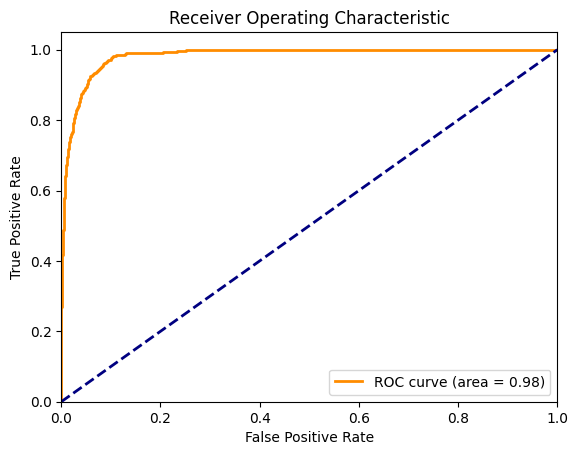

In [97]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % area)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

KS and rank order - evalution

In [102]:
probability = best_model_log.predict_proba(x_test_encoded)[:,1]
df_eva = pd.DataFrame({
    'Default Truth':y_test,
    'Default Probability':probability
})

In [104]:
pd.set_option('display.float_format',lambda x :'(:.2f)'.format(x))
df_eva_sort = df_eva.sort_values(by='Default Probability',ascending=False)
df_eva_sort

,Default Truth,Default Probability
46292,1,(:.2f)
25352,1,(:.2f)
1661,1,(:.2f)
24945,1,(:.2f)
3794,1,(:.2f)
...,...,...
5109,0,(:.2f)
33955,0,(:.2f)
26701,0,(:.2f)
34278,0,(:.2f)


In [105]:
df_eva_sort['decile'] = pd.qcut(df_eva_sort['Default Probability'],10,labels=False,duplicates='drop') 
df_eva_sort

,Default Truth,Default Probability,decile
46292,1,(:.2f),9
25352,1,(:.2f),9
1661,1,(:.2f),9
24945,1,(:.2f),9
3794,1,(:.2f),9
...,...,...,...
5109,0,(:.2f),0
33955,0,(:.2f),0
26701,0,(:.2f),0
34278,0,(:.2f),0


In [111]:
df_eva_group = df_eva_sort.groupby('decile').apply(lambda x:pd.Series({
    'Min_prob' : round(x['Default Probability'].min(),2),
    'Max_prob': round(x['Default Probability'].max(),2),
    'Event':x['Default Truth'].sum(),
    'Non_Event':x['Default Truth'].count() - x['Default Truth'].sum()
}))
df_eva_group.reset_index(inplace=True)
df_eva_group


,decile,Min_prob,Max_prob,Event,Non_Event
0,0,(:.2f),(:.2f),(:.2f),(:.2f)
1,1,(:.2f),(:.2f),(:.2f),(:.2f)
2,2,(:.2f),(:.2f),(:.2f),(:.2f)
3,3,(:.2f),(:.2f),(:.2f),(:.2f)
4,4,(:.2f),(:.2f),(:.2f),(:.2f)
5,5,(:.2f),(:.2f),(:.2f),(:.2f)
6,6,(:.2f),(:.2f),(:.2f),(:.2f)
7,7,(:.2f),(:.2f),(:.2f),(:.2f)
8,8,(:.2f),(:.2f),(:.2f),(:.2f)
9,9,(:.2f),(:.2f),(:.2f),(:.2f)


In [112]:
df_eva_group['Event_rate'] = round((df_eva_group['Event']/(df_eva_group['Event']+df_eva_group['Non_Event']))*100,2)
df_eva_group['Non_Event_rate'] = round((df_eva_group['Non_Event']/(df_eva_group['Event']+df_eva_group['Non_Event']))*100,2)
df_eva_group = df_eva_group.sort_values('decile',ascending=False).reset_index(drop=True)
df_eva_group

,decile,Min_prob,Max_prob,Event,Non_Event,Event_rate,Non_Event_rate
0,9,(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f)
1,8,(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f)
2,7,(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f)
3,6,(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f)
4,5,(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f)
5,4,(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f)
6,3,(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f)
7,2,(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f)
8,1,(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f)
9,0,(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f)


In [113]:
df_eva_group['Cum_Event'] = df_eva_group['Event'].cumsum()
df_eva_group['Cum_Non_Event'] = df_eva_group['Non_Event_rate'].cumsum()

df_eva_group['Cum_Event_rate'] = round((df_eva_group['Cum_Event']/df_eva_group['Event'].sum())*100,2)
df_eva_group['Cum_Non_Event_rate'] = round((df_eva_group['Cum_Non_Event']/df_eva_group['Non_Event'].sum())*100,2)

df_eva_group['KS'] = abs(df_eva_group['Cum_Event_rate'] - df_eva_group['Cum_Non_Event_rate'])

df_eva_group

,decile,Min_prob,Max_prob,Event,Non_Event,Event_rate,Non_Event_rate,Cum_Event,Cum_Non_Event,Cum_Event_rate,Cum_Non_Event_rate,KS
0,9,(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f)
1,8,(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f)
2,7,(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f)
3,6,(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f)
4,5,(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f)
5,4,(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f)
6,3,(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f)
7,2,(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f)
8,1,(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f)
9,0,(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f),(:.2f)


Feature Imp

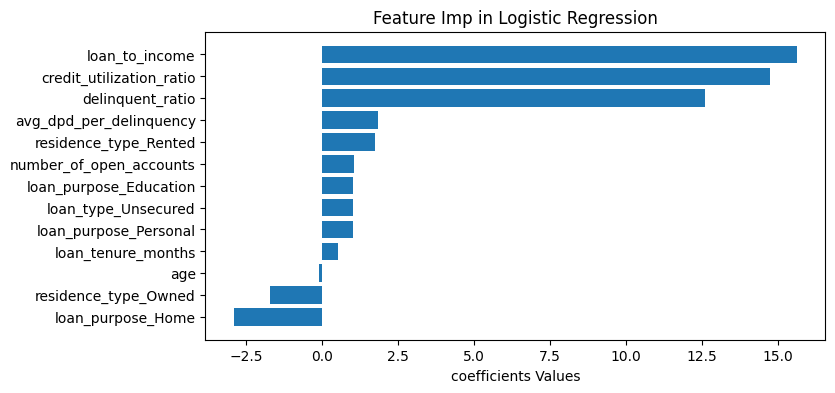

In [120]:
model = best_model_log
feature_imp = model.coef_[0]

cof_df = pd.DataFrame(feature_imp,index=x_train_encoded.columns,columns=['coefficients'])
cof_df = cof_df.sort_values(by='coefficients',ascending=True)

plt.figure(figsize=(8,4))
plt.barh(cof_df.index,cof_df['coefficients'])
plt.xlabel('coefficients Values')
plt.title('Feature Imp in Logistic Regression')
plt.show()

<Axes: xlabel='coefficients', ylabel='None'>

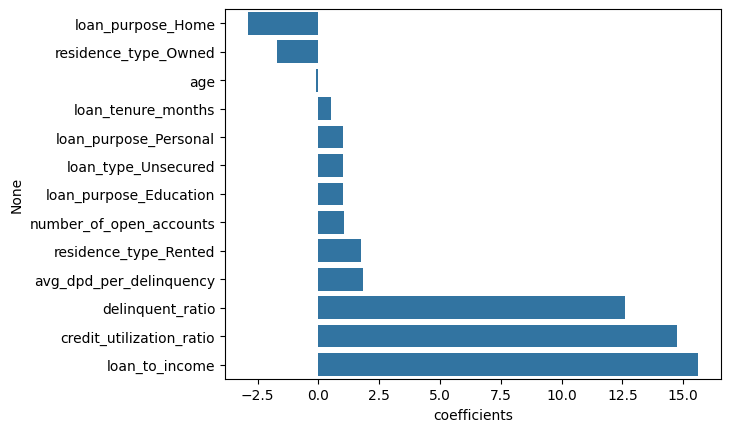

In [123]:
sns.barplot(cof_df,y=cof_df.index,x=cof_df['coefficients'])

In [124]:
gini_coefficient = 2*area-1
print(f'AUC {area}')
print(f'Gini Coefficient {gini_coefficient}')

AUC 0.983030930521893
Gini Coefficient 0.9660618610437861


Save The Model

In [114]:
from joblib import dump

model_data = {
    'model':best_model_log,
    'feature':x_train_encoded.columns,
    'scaler':scaler,
    'cols_to_scale':num_col
}
dump(model_data,'../artifacts/model_data.joblib')

['../artifacts/model_data.joblib']

In [115]:
best_model_log.coef_,best_model_log.intercept_

(array([[-0.09268788,  0.51438934,  1.0386086 , 14.73392974, 15.62428156,
         12.60083529,  1.82705926, -1.7111898 ,  1.7351732 ,  1.02127015,
         -2.91359895,  1.0053498 ,  1.0053498 ]]),
 array([-19.03432116]))